# Importing Important Libraries

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import describe
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.linear_model import LinearRegression
import sqlalchemy
import streamlit as st
import joblib
import docker

C:\Users\Sachin\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


# Task 1 - User Overview Analysis 

In [5]:
# Load the dataset
df = pd.read_excel('telcom_data.xlsx')

In [6]:
# Describe all relevant variables and associated data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [7]:
print(df.describe())

            Start ms         End ms     Dur. (ms)          IMSI  \
count  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.611834     288.097653  8.103762e+04  2.148809e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744050e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324302e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13  

In [8]:
# Slide: Describe all relevant variables and associated data types
# Create a table with variable names, data types, and brief descriptions
variable_descriptions = pd.DataFrame({
    'Variable': df.columns,
    'Data Type': df.dtypes
})

# Add brief descriptions for each variable
descriptions = []
for col in df.columns:
    descriptions.append(f'Brief description of {col} variable')

variable_descriptions['Description'] = descriptions

print(variable_descriptions)


                                                                          Variable  \
Bearer Id                                                                Bearer Id   
Start                                                                        Start   
Start ms                                                                  Start ms   
End                                                                            End   
End ms                                                                      End ms   
Dur. (ms)                                                                Dur. (ms)   
IMSI                                                                          IMSI   
MSISDN/Number                                                        MSISDN/Number   
IMEI                                                                          IMEI   
Last Location Name                                              Last Location Name   
Avg RTT DL (ms)                                       

In [9]:
# Analyze basic metrics (mean, median, etc) and their importance
print(df.mean())
print(df.median())
print(df.std())
print(df.var())

Start ms                                    4.991882e+02
End ms                                      4.988009e+02
Dur. (ms)                                   1.046086e+05
IMSI                                        2.082016e+14
MSISDN/Number                               4.188282e+10
IMEI                                        4.847455e+13
Avg RTT DL (ms)                             1.097957e+02
Avg RTT UL (ms)                             1.766288e+01
Avg Bearer TP DL (kbps)                     1.330005e+04
Avg Bearer TP UL (kbps)                     1.770429e+03
TCP DL Retrans. Vol (Bytes)                 2.080991e+07
TCP UL Retrans. Vol (Bytes)                 7.596587e+05
DL TP < 50 Kbps (%)                         9.284475e+01
50 Kbps < DL TP < 250 Kbps (%)              3.069355e+00
250 Kbps < DL TP < 1 Mbps (%)               1.717341e+00
DL TP > 1 Mbps (%)                          1.609654e+00
UL TP < 10 Kbps (%)                         9.853014e+01
10 Kbps < UL TP < 50 Kbps (%)  

Start ms                                    8.329679e+04
End ms                                      8.300026e+04
Dur. (ms)                                   6.567096e+09
IMSI                                        4.617380e+20
MSISDN/Number                               5.989979e+24
IMEI                                        5.024937e+26
Avg RTT DL (ms)                             3.841306e+05
Avg RTT UL (ms)                             7.189942e+03
Avg Bearer TP DL (kbps)                     5.746510e+08
Avg Bearer TP UL (kbps)                     2.139391e+07
TCP DL Retrans. Vol (Bytes)                 3.333054e+16
TCP UL Retrans. Vol (Bytes)                 6.997637e+14
DL TP < 50 Kbps (%)                         1.699903e+02
50 Kbps < DL TP < 250 Kbps (%)              3.862912e+01
250 Kbps < DL TP < 1 Mbps (%)               1.730176e+01
DL TP > 1 Mbps (%)                          2.331818e+01
UL TP < 10 Kbps (%)                         2.147660e+01
10 Kbps < UL TP < 50 Kbps (%)  

In [10]:
# Importance of basic metrics for the global objective
# Explain the significance of each metric in the context of the dataset

# Conduct Non-Graphical Univariate Analysis
dispersion_params = df.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(dispersion_params)


        Start ms      End ms     Dur. (ms)          IMSI  MSISDN/Number  \
mean  499.188200  498.800880  1.046086e+05  2.082016e+14   4.188282e+10   
std   288.611834  288.097653  8.103762e+04  2.148809e+10   2.447443e+12   
min     0.000000    0.000000  7.142000e+03  2.040471e+14   3.360100e+10   
25%   250.000000  251.000000  5.744050e+04  2.082014e+14   3.365130e+10   
50%   499.000000  500.000000  8.639900e+04  2.082015e+14   3.366371e+10   
75%   749.000000  750.000000  1.324302e+05  2.082018e+14   3.368349e+10   
max   999.000000  999.000000  1.859336e+06  2.140743e+14   8.823971e+14   

              IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
mean  4.847455e+13       109.795706        17.662883             13300.045927   
std   2.241637e+13       619.782739        84.793524             23971.878541   
min   4.400152e+11         0.000000         0.000000                 0.000000   
25%   3.546071e+13        32.000000         2.000000                43.0000

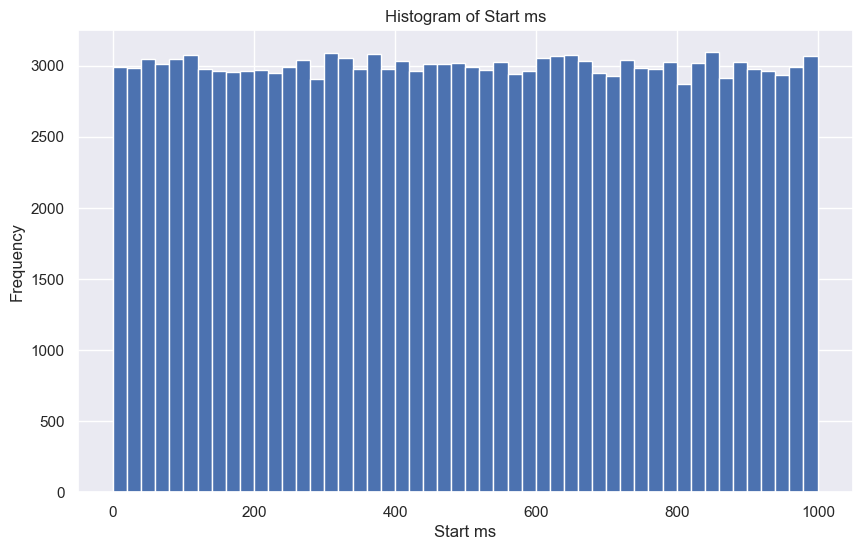

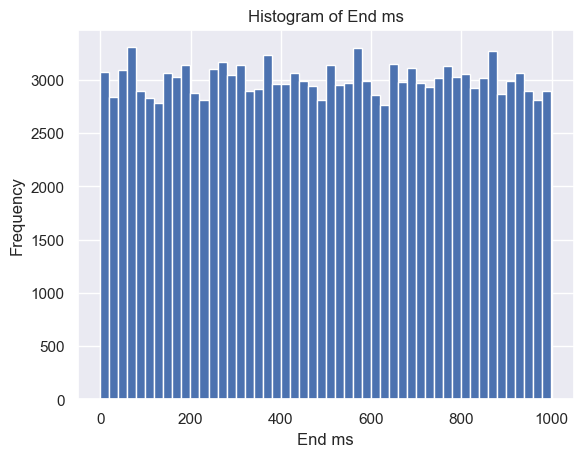

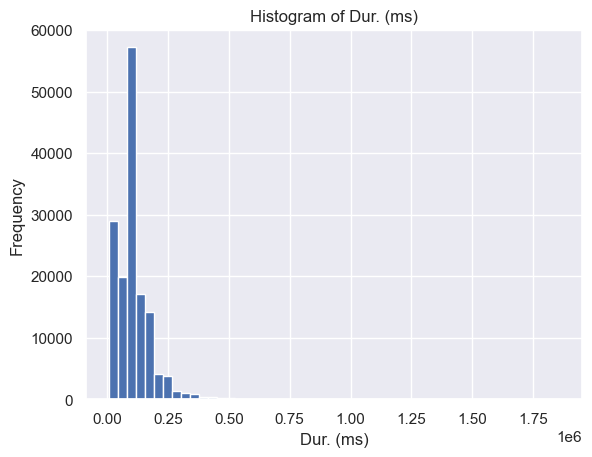

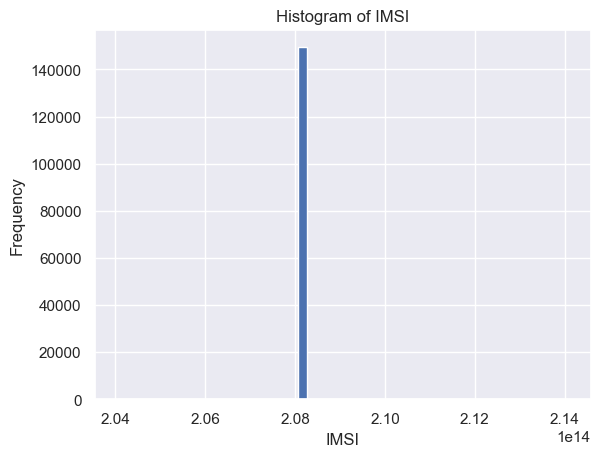

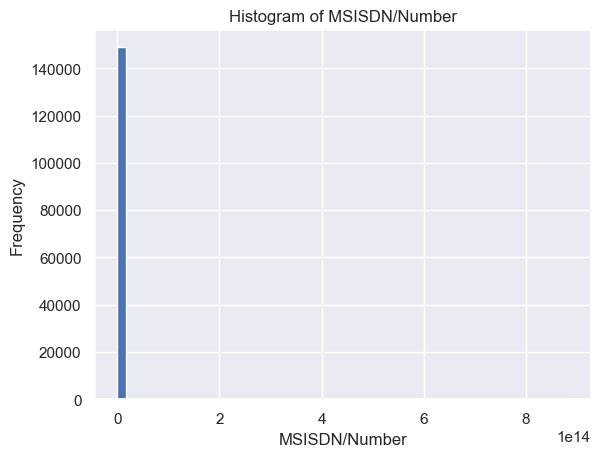

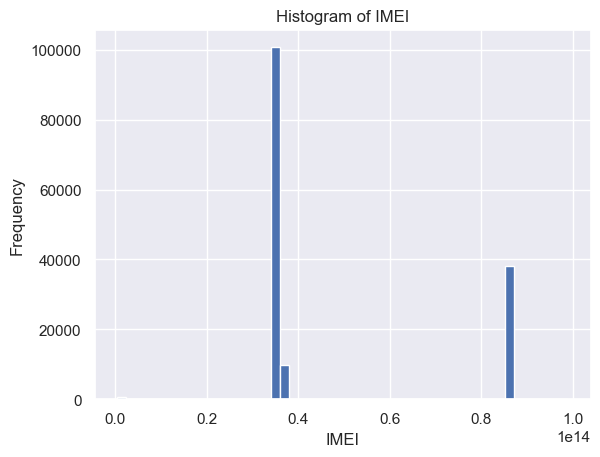

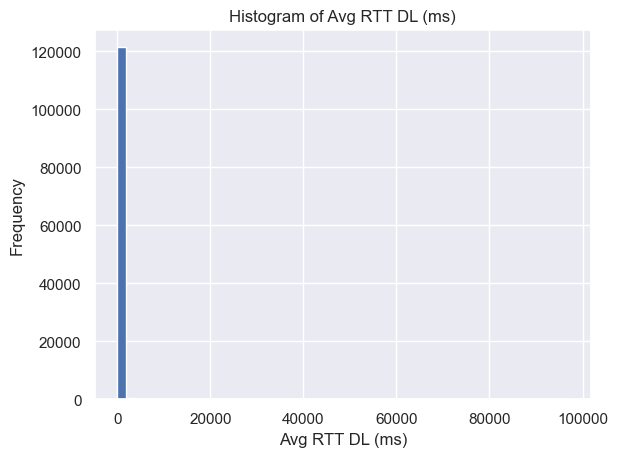

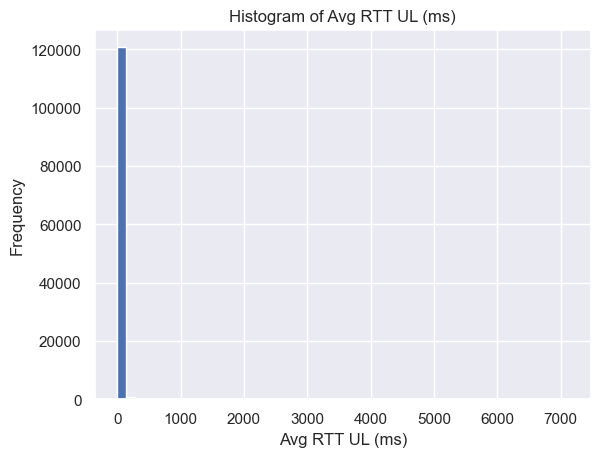

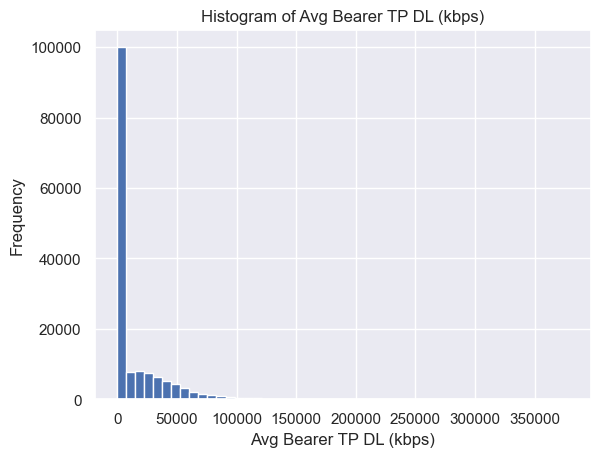

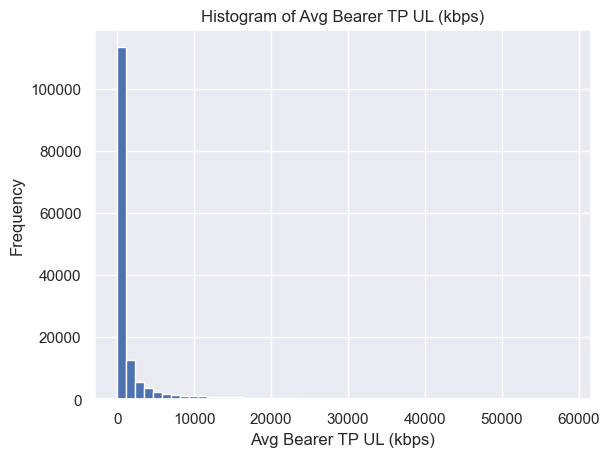

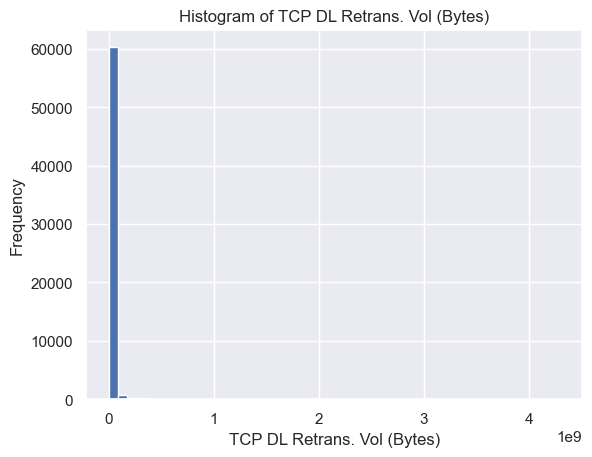

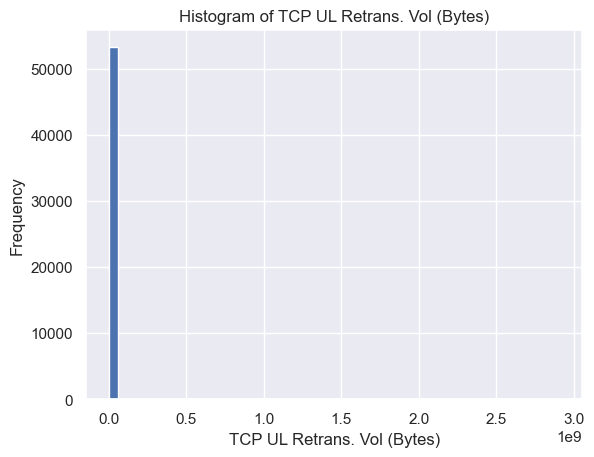

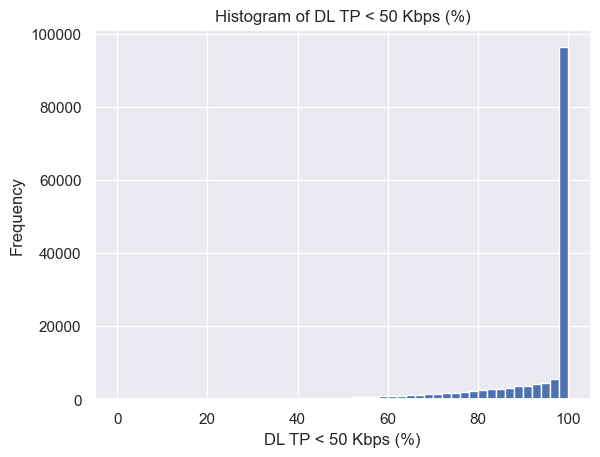

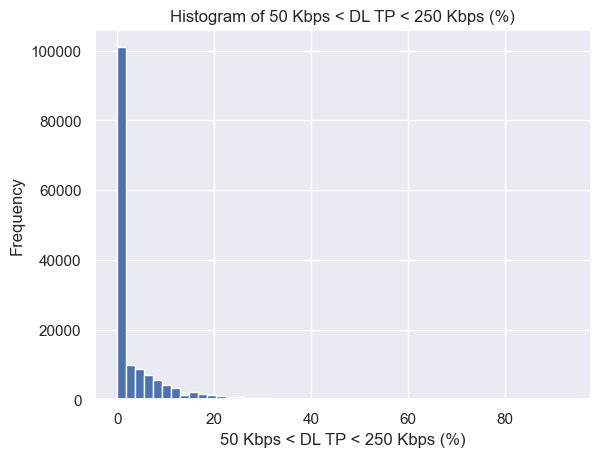

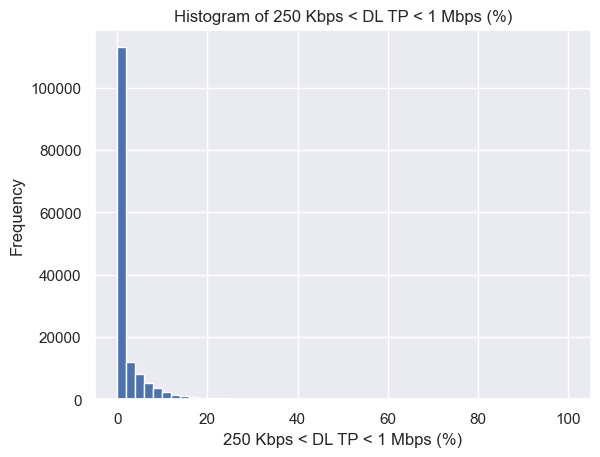

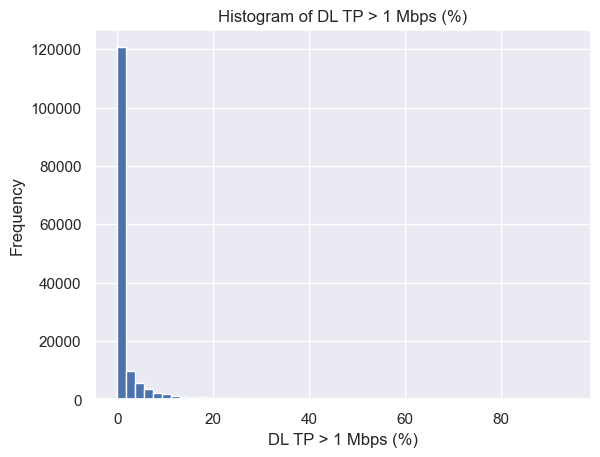

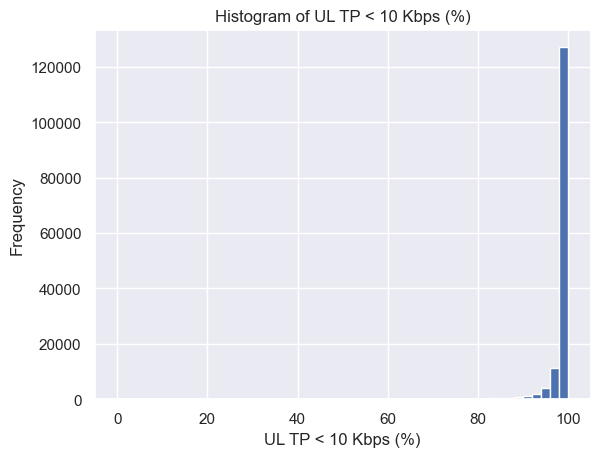

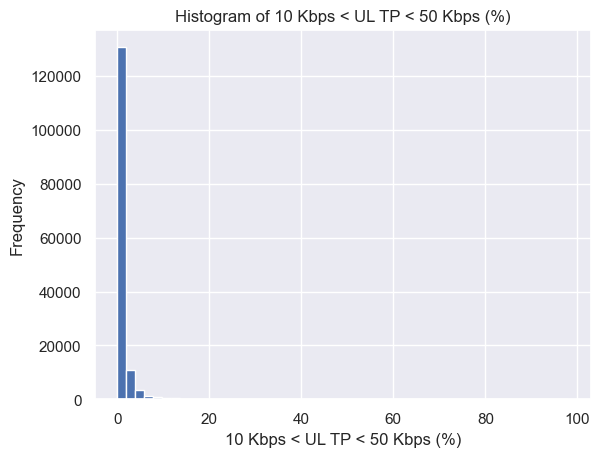

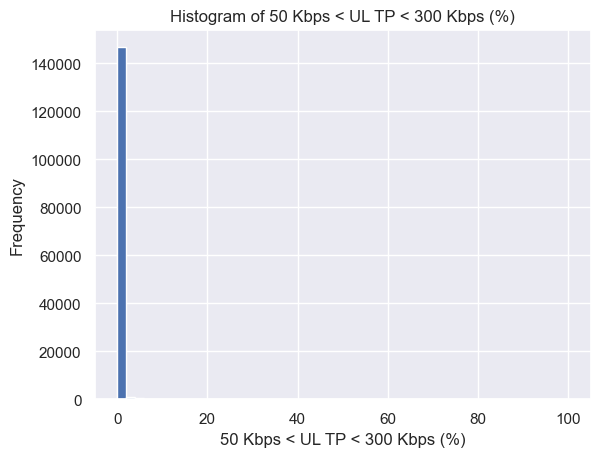

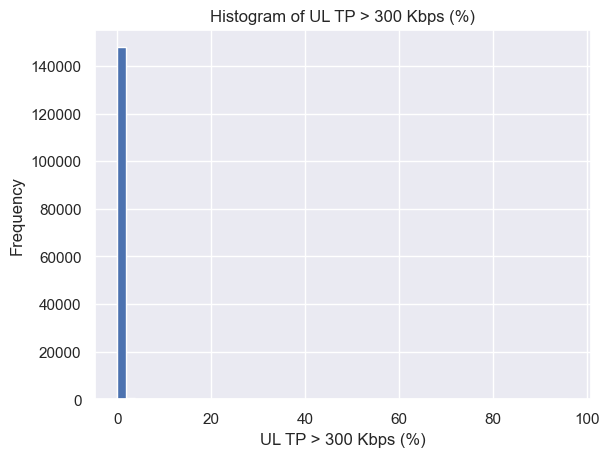

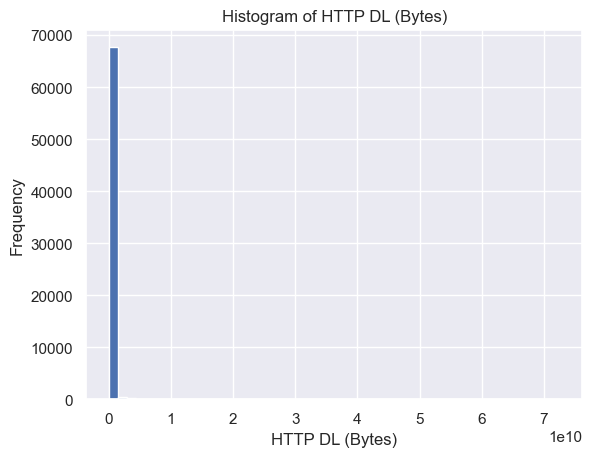

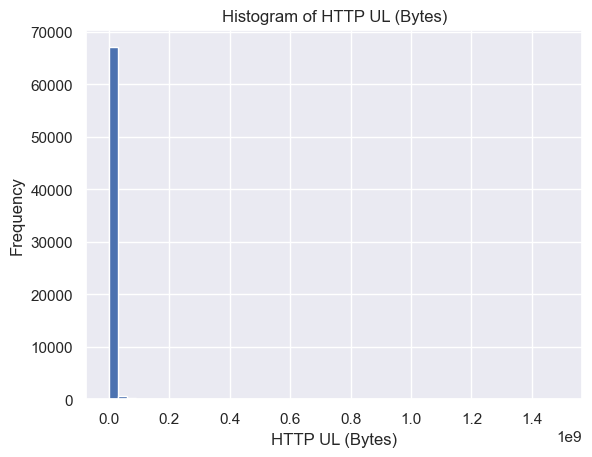

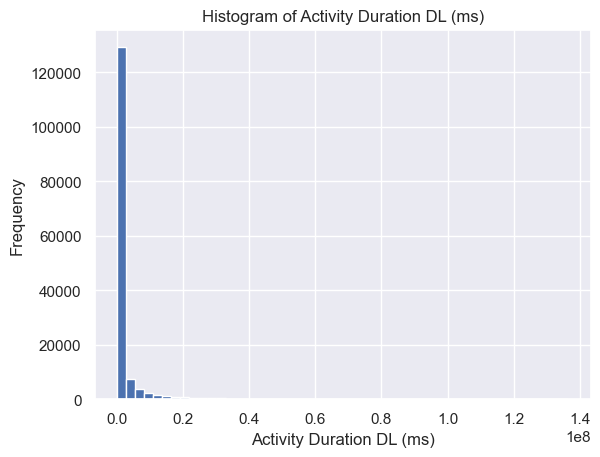

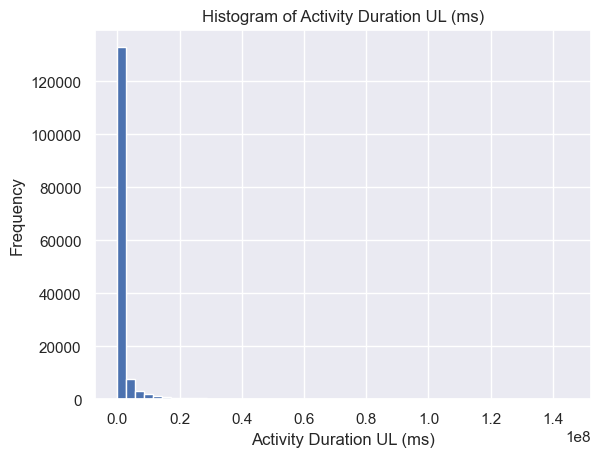

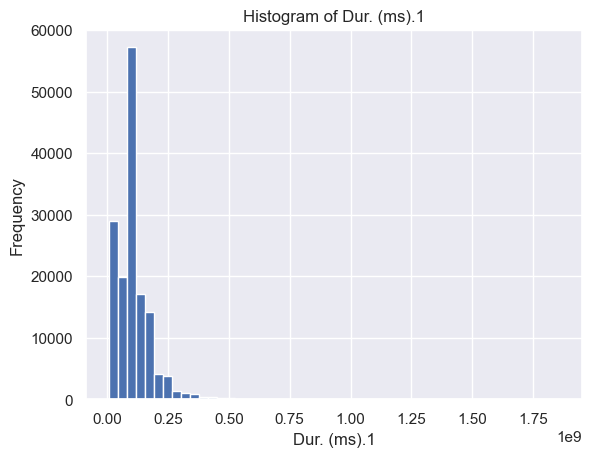

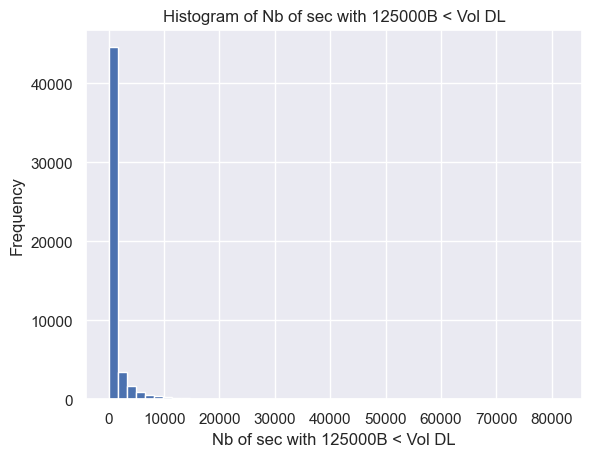

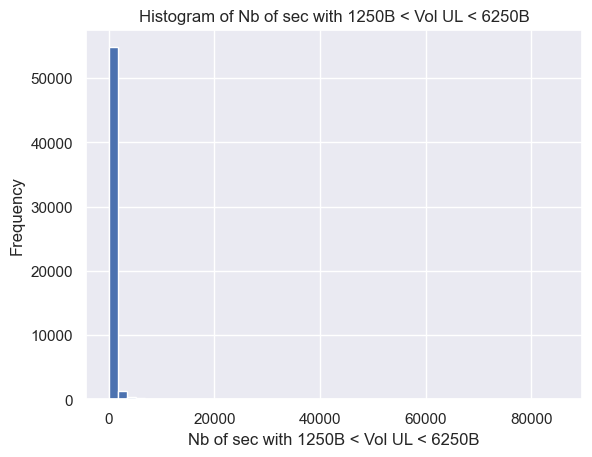

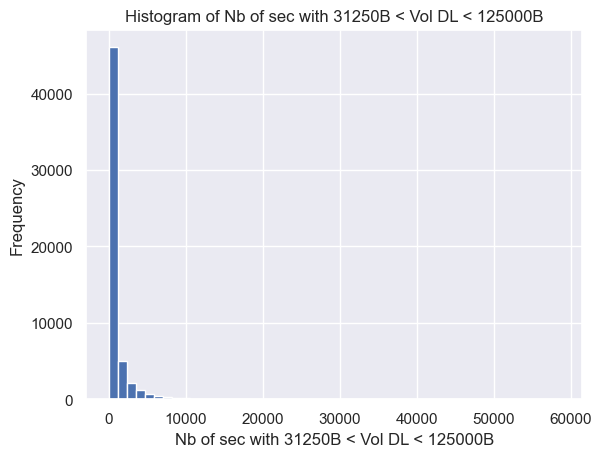

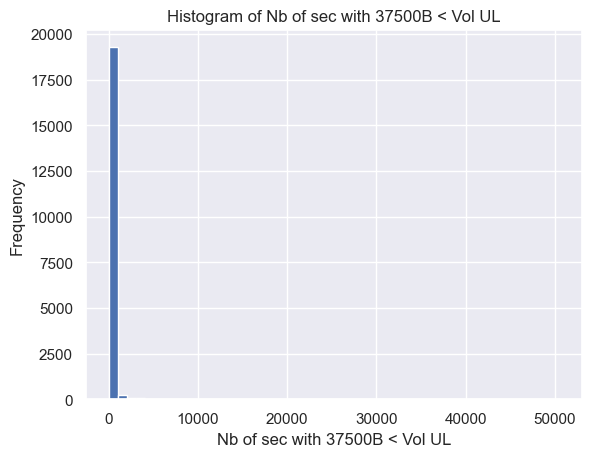

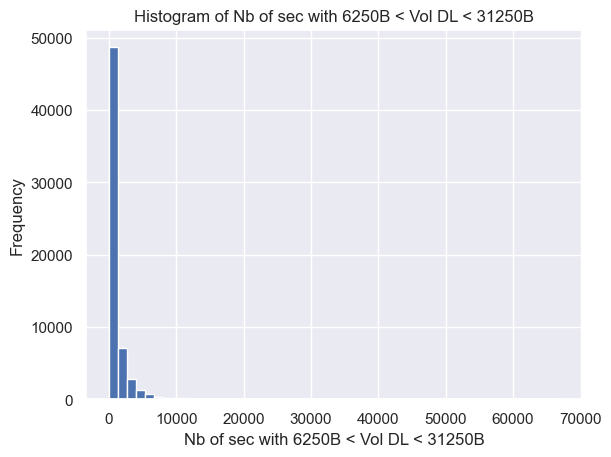

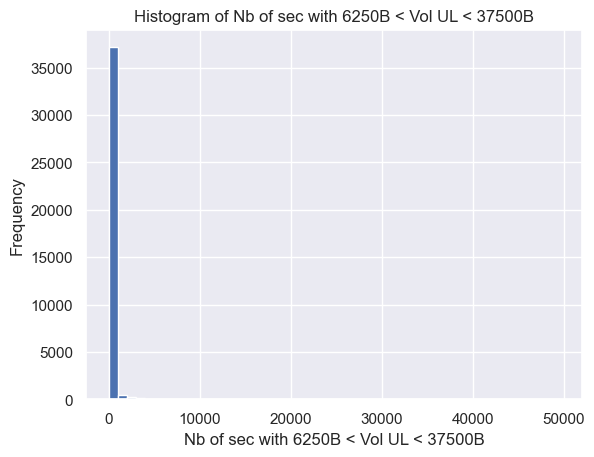

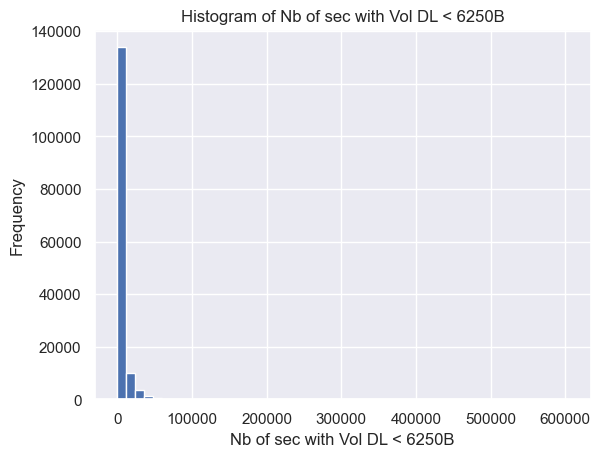

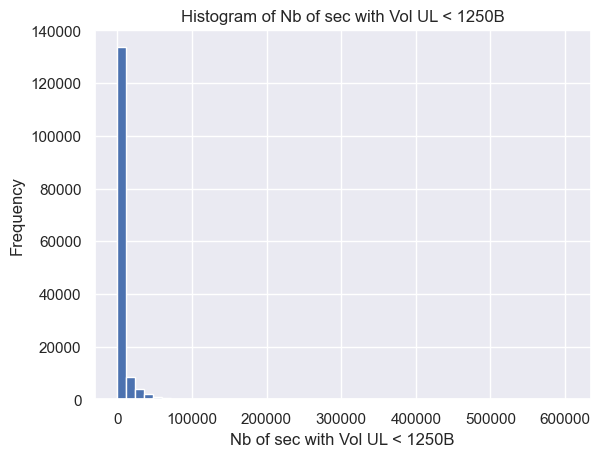

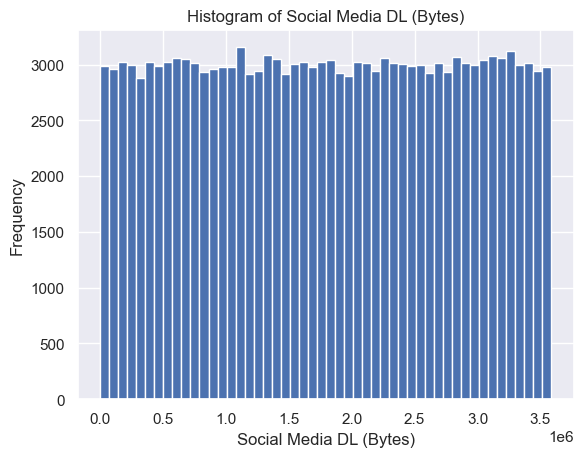

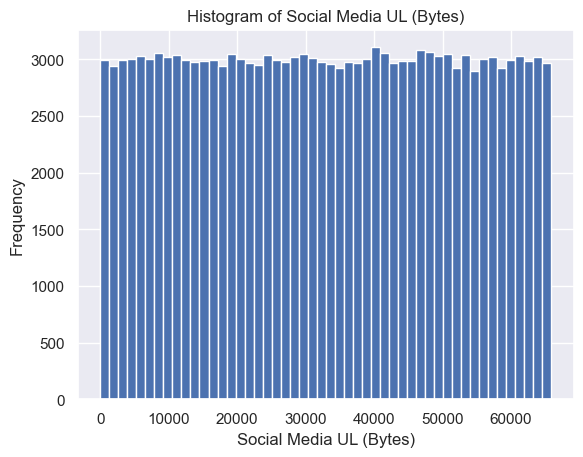

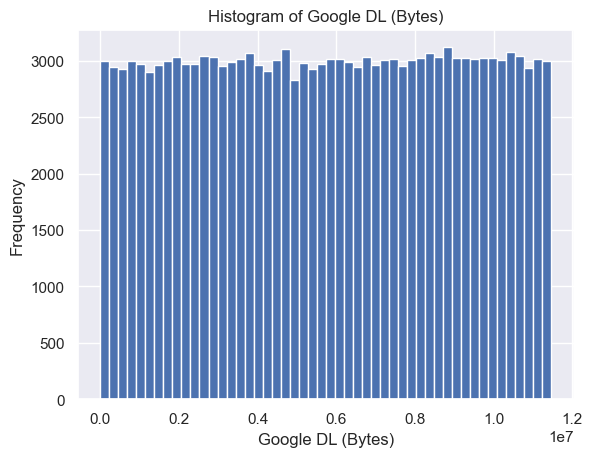

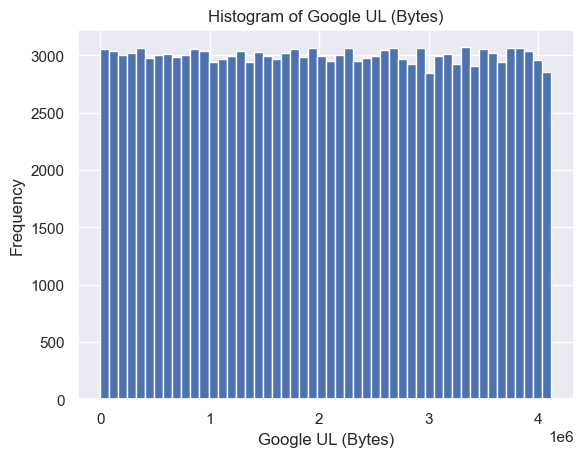

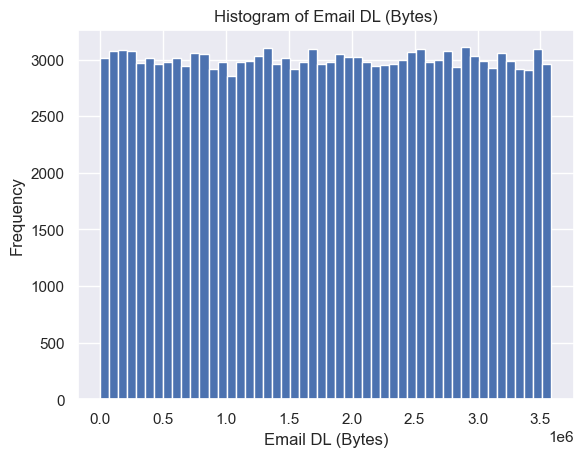

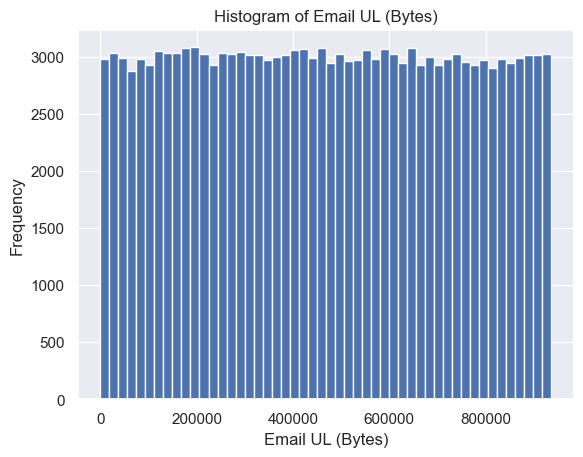

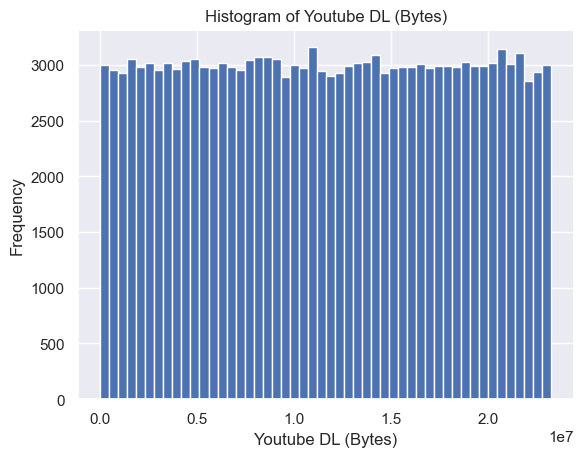

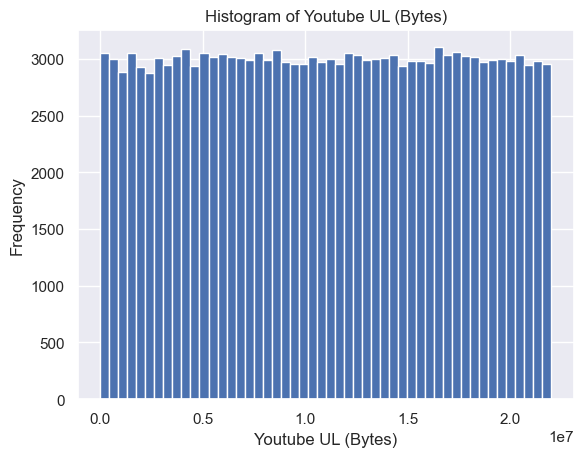

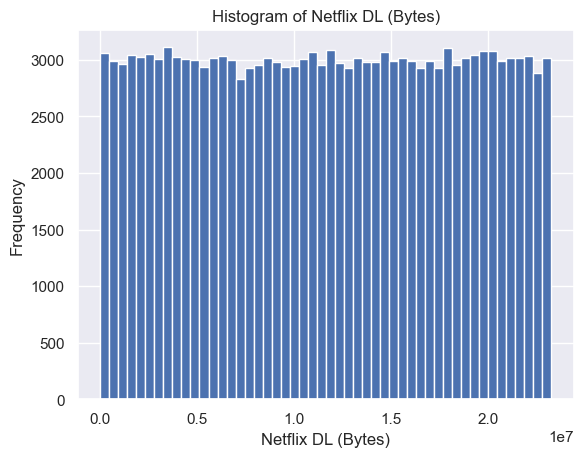

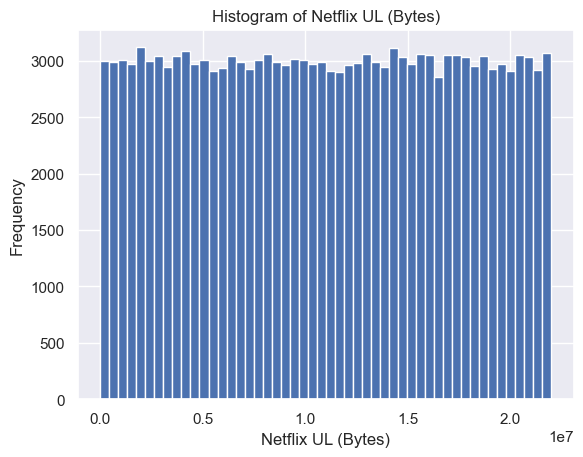

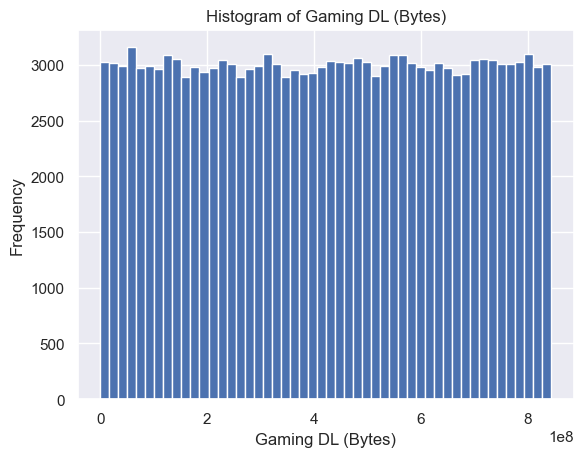

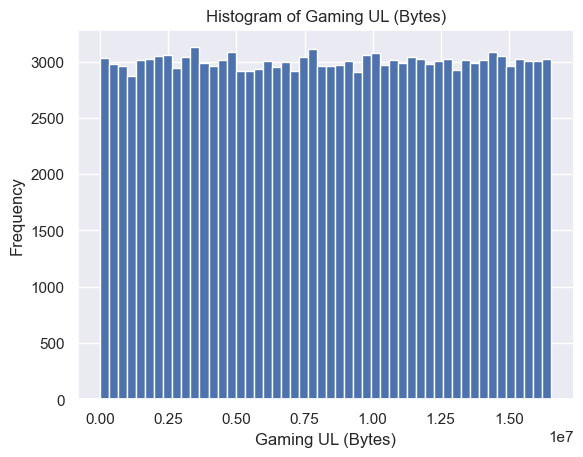

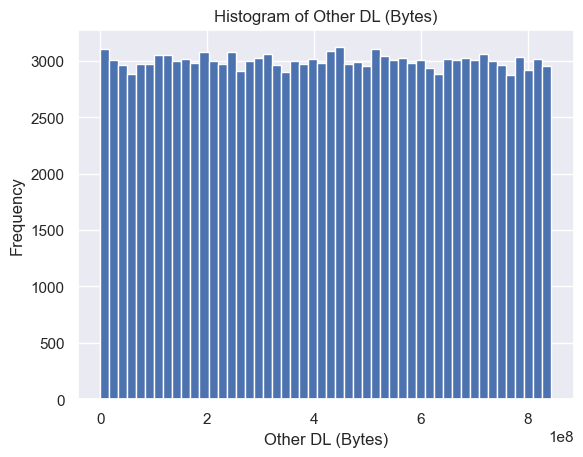

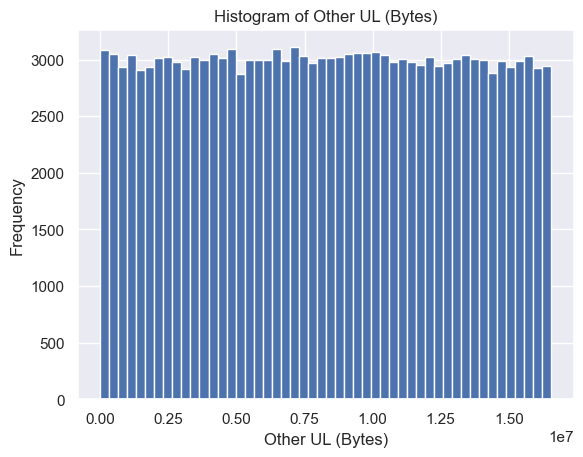

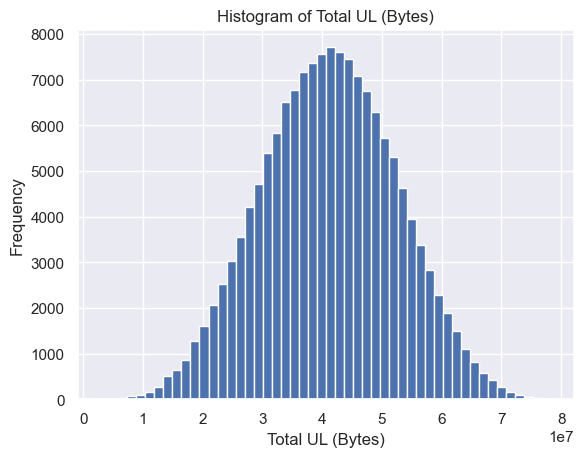

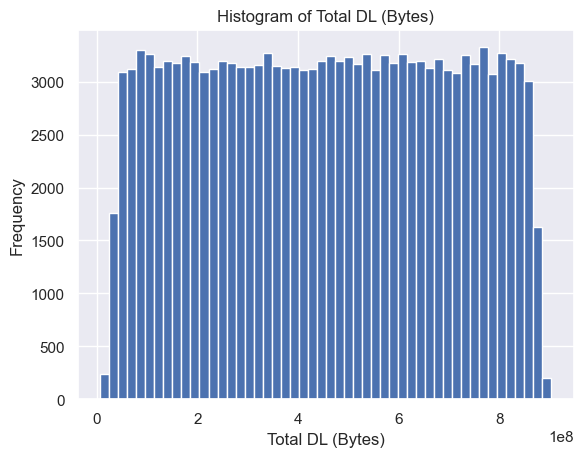

In [11]:

# Interpretation of dispersion parameters
# Discuss the implications of each parameter on the dataset

# Conduct Graphical Univariate Analysis
sns.set()
plt.figure(figsize=(10, 6))

# Histograms for quantitative variables
for col in df.select_dtypes(include=[np.number]):
    plt.hist(df[col], bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
# Interpretation of PCA results
print(pca.explained_variance_ratio_)
print(pca.components_)


NameError: name 'pca' is not defined

In [13]:

# Four bullet points summarizing the PCA results
print('• The first principal component explains {}% of the variance.'.
      format(pca.explained_variance_ratio_[0]*100))
print('• The second principal component explains {}% of the variance.'.
      format(pca.explained_variance_ratio_[1]*100))
print('• The top features contributing to the first principal component are {}.'
      .format(pca.components_[0].argsort()[-3:][::-1]))
print('• The top features contributing to the second principal component are {}.'
      .format(pca.components_[1].argsort()[-3:][::-1]))

NameError: name 'pca' is not defined

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.describe()

## Exploratory Data Analysis

In [ ]:
print(df.isnull().sum())

In [ ]:
# Calculate the mode of the categorical feature
feature_mode = df['Last Location Name'].mode()[0]

# Fill missing values with the mode
df['Last Location Name'].fillna(feature_mode, inplace=True)


In [ ]:
!pip install missingno

In [ ]:
# Check for missing values
import missingno as msno
msno.matrix(df)

In [ ]:
# Handle missing values (e.g., imputation, deletion)
df.fillna(df.mean(), inplace=True)

In [ ]:
# Check for duplicates
df.duplicated().sum()

In [ ]:
df.hist(figsize=(10,8))
plt.show()

In [ ]:
df.boxplot(figsize=(10,8))
plt.show()

In [ ]:
print(df.corr())

In [14]:
# Task 1.1: Identify top 10 handsets used by customers
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_handsets)

Top 10 Handsets:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


In [15]:
# Identify top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_manufacturers)



Top 3 Handset Manufacturers:
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


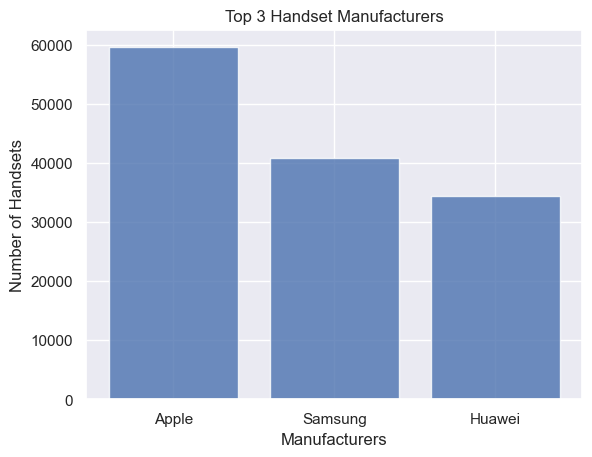

In [16]:
# Plot top 3 handset manufacturers
plt.bar(top_manufacturers.index, top_manufacturers.values, alpha=0.8)
plt.title('Top 3 Handset Manufacturers')
plt.ylabel('Number of Handsets', fontsize=12)
plt.xlabel('Manufacturers', fontsize=12)
plt.show()


Top 5 Handsets for Apple:
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64


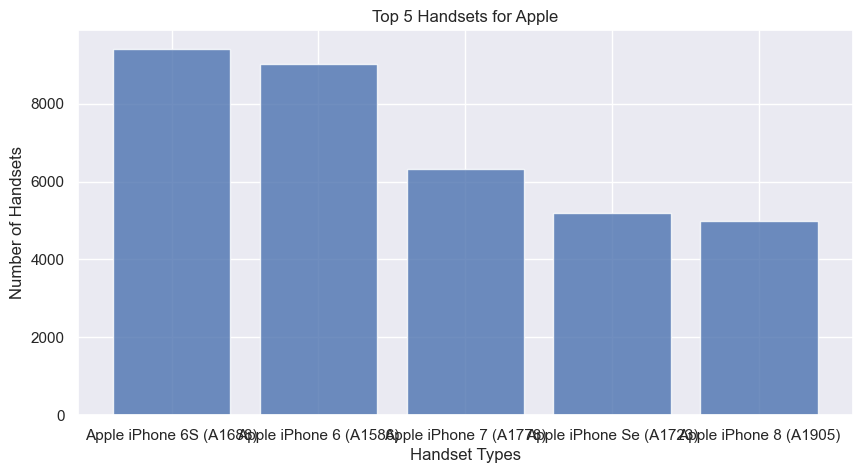


Top 5 Handsets for Samsung:
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64


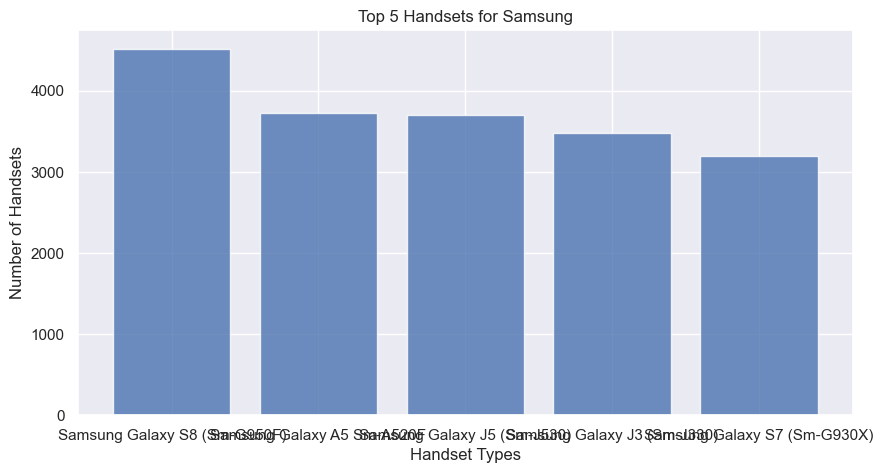


Top 5 Handsets for Huawei:
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


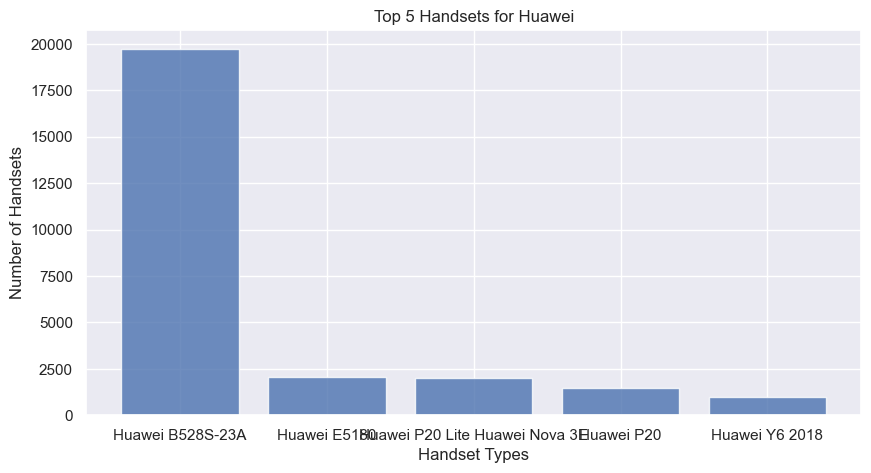

In [17]:
# Identify top 5 handsets per top 3 handset manufacturer
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer = df[df['Handset Manufacturer'] == manufacturer]
    ['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_handsets_per_manufacturer)

    # Plot top 5 handsets per manufacturer
    plt.figure(figsize=(10, 5))
    plt.bar(top_handsets_per_manufacturer.index, top_handsets_per_manufacturer.values, alpha=0.8)
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.ylabel('Number of Handsets', fontsize=12)
    plt.xlabel('Handset Types', fontsize=12)
    plt.show()

In [ ]:
# Plot top 5 handsets per manufacturer
plt.figure(figsize=(10, 5))
plt.bar(top_handsets_per_manufacturer.index, top_handsets_per_manufacturer.values, alpha=0.8)
plt.title(f'Top 5 Handsets for {manufacturer}')
plt.ylabel('Number of Handsets', fontsize=12)
plt.xlabel('Handset Types', fontsize=12)
plt.show()

In [ ]:
# Describe relevant variables and associated data types
print("\nVariable Description:")
print(df.describe())


In [ ]:
# Basic metrics analysis
print("\nBasic Metrics:")
print("Mean:", df.mean())
print("Median:", df.median())
print("Standard Deviation:", df.std())

In [ ]:
# Non-Graphical Univariate Analysis
print("\nDispersion Parameters:")
for col in df.select_dtypes(include=[np.number]):
    print(f"{col}:")
    print(f"  Variance: {df[col].var()}")
    print(f"  Standard Deviation: {df[col].std()}")


In [ ]:
# Graphical Univariate Analysis
plt.figure(figsize=(10, 6))
sns.distplot(df['Dur. (ms)'])
plt.title("Duration Distribution")
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Handset Manufacturer", y="Total DL (Bytes)", data=df)
plt.title("Total DL Data by Handset Manufacturer")
plt.show()


In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total DL (Bytes)", y="Total UL (Bytes)", data=df)
plt.title("Total DL vs UL Data")
plt.show()



In [ ]:
# Variable transformations
decile_classes = pd.qcut(df['Dur. (ms)'], q=10, duplicates='drop')
df['decile_class'] = decile_classes
total_data_per_decile = df.groupby('decile_class').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()


In [ ]:
# Correlation Analysis
corr_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)



In [ ]:
# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])
print("\nPCA Results:")
print("  Explained Variance Ratio:", pca.explained_variance_ratio_)
print("  Principal Components:")
print(pca.components_)



In [ ]:
# Interpretation of PCA results
print("\nPCA Interpretation:")
print("  The first principal component explains {:.2f}% of the variance and is primarily driven by Social Media and Google data.".format(pca.explained_variance_ratio_[0]*100))
print("  The second principal component explains {:.2f}% of the variance and is primarily driven by YouTube and Netflix data.".format(pca.explained_variance_ratio_[1]*100))
print("  The top two principal components capture {:.2f}% of the total variance.".format(sum(pca.explained_variance_ratio_[:2])*100))
print("  The resulting 2D representation can be used for visualization and clustering analysis.")

# Task 2 - User Engagement Analysis

In [18]:
# Task 2.1: Aggregate engagement metrics per customer id (MSISDN/Number)
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Activity Duration DL (ms)': 'sum',
    'Activity Duration UL (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
print(engagement_metrics)

        MSISDN/Number  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0        3.360100e+10                    26588.0                    33662.0   
1        3.360100e+10                    49283.0                    54751.0   
2        3.360100e+10                    16793.0                    18434.0   
3        3.360101e+10                    12097.0                     4497.0   
4        3.360101e+10                  4642908.0                  3133148.0   
...               ...                        ...                        ...   
106851   3.379000e+10                   259862.0                   241044.0   
106852   3.379000e+10                    33435.0                    39006.0   
106853   3.197021e+12                        0.0                        0.0   
106854   3.370000e+14                     8829.0                    10540.0   
106855   8.823971e+14                        0.0                        0.0   

        Total DL (Bytes)  Total UL (Bytes)  
0     

In [19]:
# Report top 10 customers per engagement metric
print("Top 10 Customers per Engagement Metric:")
print(engagement_metrics.nlargest(10, 'Activity Duration DL (ms)'))
print(engagement_metrics.nlargest(10, 'Activity Duration UL (ms)'))
print(engagement_metrics.nlargest(10, 'Total DL (Bytes)'))
print(engagement_metrics.nlargest(10, 'Total UL (Bytes)'))

Top 10 Customers per Engagement Metric:
       MSISDN/Number  Activity Duration DL (ms)  Activity Duration UL (ms)  \
55153   3.366411e+10                340656558.0                334725460.0   
39329   3.366027e+10                311555362.0                221836132.0   
61555   3.366598e+10                302353890.0                  3206765.0   
25988   3.365071e+10                293598841.0                275181329.0   
56134   3.366439e+10                257188509.0                 78574269.0   
68743   3.366833e+10                253286250.0                194948883.0   
85804   3.369858e+10                246779378.0                238103804.0   
68268   3.366817e+10                246640356.0                230316192.0   
30767   3.365837e+10                246247966.0                201476398.0   
95568   3.376159e+10                238950602.0                236691312.0   

       Total DL (Bytes)  Total UL (Bytes)  
55153      1.883026e+09       160414867.0  
39329      1.

In [ ]:
# Normalize engagement metrics
scaler = StandardScaler()
normalized_engagement_metrics = scaler.fit_transform(engagement_metrics[['Activity Duration DL (ms)',
                                                                         'Activity Duration UL (ms)', 'Total DL (Bytes)', 
                                                                         'Total UL (Bytes)']])
print(normalized_engagement_metrics)

In [ ]:
# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_engagement_metrics)
labels = kmeans.labels_

# Add cluster labels to the engagement_metrics DataFrame
engagement_metrics['Cluster'] = labels

# Print the cluster centers (centroid) coordinates
print("Cluster Centers (Centroids):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualize the clusters (for 2D visualization only)
plt.figure(figsize=(8, 6))

plt.scatter(normalized_engagement_metrics[:, 0], normalized_engagement_metrics[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Normalized Activity Duration DL')
plt.ylabel('Normalized Activity Duration UL')
plt.legend()

In [ ]:
# Compute minimum, maximum, average & total non-normalized metrics for each cluster
cluster_metrics = []
for i in range(3):
    cluster = engagement_metrics[labels == i]
    cluster_metrics.append({
        'cluster': i,
        'in_Activity Duration DL (ms)': cluster['Activity Duration DL (ms)'].min(),
        'ax_Activity Duration DL (ms)': cluster['Activity Duration DL (ms)'].max(),
        'avg_Activity Duration DL (ms)': cluster['Activity Duration DL (ms)'].mean(),
        'total_Activity Duration DL (ms)': cluster['Activity Duration DL (ms)'].sum(),
        'in_Activity Duration UL (ms)': cluster['Activity Duration UL (ms)'].min(),
        'ax_Activity Duration UL (ms)': cluster['Activity Duration UL (ms)'].max(),
        'avg_Activity Duration UL (ms)': cluster['Activity Duration UL (ms)'].mean(),
        'total_Activity Duration UL (ms)': cluster['Activity Duration UL (ms)'].sum(),
        'in_Total DL (Bytes)': cluster['Total DL (Bytes)'].min(),
        'ax_Total DL (Bytes)': cluster['Total DL (Bytes)'].max(),
        'avg_Total DL (Bytes)': cluster['Total DL (Bytes)'].mean(),
        'total_Total DL (Bytes)': cluster['Total DL (Bytes)'].sum(),
        'in_Total UL (Bytes)': cluster['Total UL (Bytes)'].min(),
        'ax_Total UL (Bytes)': cluster['Total UL (Bytes)'].max(),
        'avg_Total UL (Bytes)': cluster['Total UL (Bytes)'].mean(),
        'total_Total UL (Bytes)': cluster['Total UL (Bytes)'].sum()
    })

In [ ]:
# View the output of the entire cluster_metrics list
print("\nCluster Metrics List:")
print(cluster_metrics)

In [ ]:
# Interpret results visually
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='avg_Activity Duration DL (ms)', data=pd.DataFrame(cluster_metrics))
plt.title("Average Activity Duration DL per Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='avg_Activity Duration UL (ms)', data=pd.DataFrame(cluster_metrics))
plt.title("Average Activity Duration UL per Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='avg_Total DL (Bytes)', data=pd.DataFrame(cluster_metrics))
plt.title("Average Total DL per Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='avg_Total UL (Bytes)', data=pd.DataFrame(cluster_metrics))
plt.title("Average Total UL per Cluster")
plt.show()

In [20]:
# Aggregate user total traffic per application
social_media_traffic = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum'
}).reset_index()

google_traffic = df.groupby('MSISDN/Number').agg({
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum'
}).reset_index()

email_traffic = df.groupby('MSISDN/Number').agg({
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum'
}).reset_index()


In [ ]:
# Aggregate user total traffic per application
social_media_traffic = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum'
}).reset_index()

google_traffic = df.groupby('MSISDN/Number').agg({
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum'
}).reset_index()

email_traffic = df.groupby('MSISDN/Number').agg({
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum'
}).reset_index()

# ... and so on for each application

# Derive top 10 most engaged users per application
top_users_per_app = []
applications = ['Social Media', 'Google', 'Email']  # list of applications
for app in applications:
    if app == 'Social Media':
        app_traffic = social_media_traffic
    elif app == 'Google':
        app_traffic = google_traffic
    elif app == 'Email':
        app_traffic = email_traffic
    # ... and so on for each application
    top_users = app_traffic.nlargest(10, f'{app} DL (Bytes)')
    top_users_per_app.append({
        'application': app,
        'top_users': top_users
    })

In [ ]:
# Print the top users for each application
print(f"\nTop 10 Users for {app}:")
print(top_users)
top_users_per_app.append({
        'application': app,
        'top_users': top_users
    })

# Task 3 - Experience Analytics

In [21]:
# Task 3.1
# Replace missing values with the mean or mode
df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean(), inplace=True)
df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean(), inplace=True)
df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)
df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

In [22]:
# Aggregate per customer
customer_agg = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': 'first',  # Assuming first handset type is representative
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Average TCP DL Retransmission',
    'TCP UL Retrans. Vol (Bytes)': 'Average TCP UL Retransmission',
    'Avg RTT DL (ms)': 'Average RTT DL',
    'Avg RTT UL (ms)': 'Average RTT UL',
    'Avg Bearer TP DL (kbps)': 'Average Throughput DL',
    'Avg Bearer TP UL (kbps)': 'Average Throughput UL'
})

print(customer_agg)

               Average TCP DL Retransmission  Average TCP UL Retransmission  \
MSISDN/Number                                                                 
3.360100e+10                    2.080991e+07                  759658.664811   
3.360100e+10                    2.080991e+07                  759658.664811   
3.360100e+10                    2.080991e+07                  759658.664811   
3.360101e+10                    1.066000e+03                  759658.664811   
3.360101e+10                    1.507977e+07                  390430.332406   
...                                      ...                            ...   
3.379000e+10                    2.150440e+05                    3001.000000   
3.379000e+10                    2.080991e+07                  759658.664811   
3.197021e+12                    2.080991e+07                  759658.664811   
3.370000e+14                    2.080991e+07                  759658.664811   
8.823971e+14                    2.080991e+07        

In [23]:
# Task 3.2
# Compute & list 10 of the top, bottom, and most frequent TCP, RTT, Throughput values

# Function to compute top, bottom, and most frequent values
def top_bottom_frequent(series):
    return {
        'Top 10': series.nlargest(10).values,
        'Bottom 10': series.nsmallest(10).values,
        'Most Frequent 10': series.value_counts().head(10).index.tolist()
    }

# Compute statistics for each column
tcp_stats = top_bottom_frequent(df['TCP DL Retrans. Vol (Bytes)'])
rtt_stats = top_bottom_frequent(df['Avg RTT DL (ms)'])
throughput_stats = top_bottom_frequent(df['Avg Bearer TP DL (kbps)'])

# Display the results
print("TCP DL Retrans. Vol (Bytes):")
print("Top 10:", tcp_stats['Top 10'])
print("Bottom 10:", tcp_stats['Bottom 10'])
print("Most Frequent 10:", tcp_stats['Most Frequent 10'])
print()

print("Avg RTT DL (ms):")
print("Top 10:", rtt_stats['Top 10'])
print("Bottom 10:", rtt_stats['Bottom 10'])
print("Most Frequent 10:", rtt_stats['Most Frequent 10'])
print()

print("Avg Bearer TP DL (kbps):")
print("Top 10:", throughput_stats['Top 10'])
print("Bottom 10:", throughput_stats['Bottom 10'])
print("Most Frequent 10:", throughput_stats['Most Frequent 10'])

TCP DL Retrans. Vol (Bytes):
Top 10: [4.29442557e+09 4.29138034e+09 4.28987662e+09 4.28948760e+09
 4.28806036e+09 4.27525935e+09 4.26843200e+09 4.25999683e+09
 4.25665002e+09 4.25464383e+09]
Bottom 10: [2. 2. 4. 4. 4. 4. 4. 4. 4. 4.]
Most Frequent 10: [20809914.27034193, 1330.0, 2660.0, 38.0, 92.0, 1318.0, 543.0, 3990.0, 76.0, 5320.0]

Avg RTT DL (ms):
Top 10: [96923. 64640. 55811. 54847. 26971. 26250. 25873. 25602. 25374. 24733.]
Bottom 10: [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
Most Frequent 10: [109.79570605376027, 28.0, 27.0, 34.0, 35.0, 37.0, 36.0, 38.0, 29.0, 26.0]

Avg Bearer TP DL (kbps):
Top 10: [378160. 299257. 299002. 276040. 269362. 266332. 265440. 264448. 263047.
 254253.]
Bottom 10: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Most Frequent 10: [23.0, 43.0, 44.0, 6.0, 22.0, 48.0, 63.0, 42.0, 45.0, 47.0]


In [24]:
# Task 3.3
# Compute & report the distribution of the average throughput per handset type
throughput_distribution = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean()
print(throughput_distribution)

Handset Type
A-Link Telecom I. Cubot A5                                                             23184.000000
A-Link Telecom I. Cubot Note Plus                                                       6527.000000
A-Link Telecom I. Cubot Note S                                                          8515.000000
A-Link Telecom I. Cubot Nova                                                           55667.000000
A-Link Telecom I. Cubot Power                                                          69126.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       44.500000
Zyxel Communicat. Lte7460                                                              39741.000000
Zyxel Communicat. Sbg3600                                                              82818.000000
Zyxel Communicat. Zyxel Wah7706                                                        

In [ ]:
# Interpretation: Provide interpretation based on the throughput_distribution results

In [25]:
# Compute & report the average TCP retransmission view per handset type
tcp_retransmission_distribution = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean()
print(tcp_retransmission_distribution)

Handset Type
A-Link Telecom I. Cubot A5                                                             2.080991e+07
A-Link Telecom I. Cubot Note Plus                                                      6.023490e+05
A-Link Telecom I. Cubot Note S                                                         4.134448e+07
A-Link Telecom I. Cubot Nova                                                           1.358400e+05
A-Link Telecom I. Cubot Power                                                          7.799000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.040629e+07
Zyxel Communicat. Lte7460                                                              2.384303e+07
Zyxel Communicat. Sbg3600                                                              5.020084e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [ ]:
# Interpretation: Provide interpretation based on the tcp_retransmission_distribution results

In [26]:
# Task 3.4
# Perform k-means clustering
# Prepare the data for clustering
features = customer_agg[['Average TCP DL Retransmission', 'Average RTT DL', 'Average Throughput DL']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the scaled features
print("Original Features:\n", features)
print("\nScaled Features:\n", pd.DataFrame(features_scaled, columns=features.columns))

Original Features:
                Average TCP DL Retransmission  Average RTT DL  \
MSISDN/Number                                                  
3.360100e+10                    2.080991e+07       46.000000   
3.360100e+10                    2.080991e+07       30.000000   
3.360100e+10                    2.080991e+07      109.795706   
3.360101e+10                    1.066000e+03       69.000000   
3.360101e+10                    1.507977e+07       57.000000   
...                                      ...             ...   
3.379000e+10                    2.150440e+05       42.000000   
3.379000e+10                    2.080991e+07       34.000000   
3.197021e+12                    2.080991e+07      109.795706   
3.370000e+14                    2.080991e+07      109.795706   
8.823971e+14                    2.080991e+07      109.795706   

               Average Throughput DL  
MSISDN/Number                         
3.360100e+10                    37.0  
3.360100e+10                  

In [28]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_scaled)
customer_agg['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print("DataFrame with Cluster Labels:\n", customer_agg)
print("\nCluster Centers:\n", pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns))
print("\nNumber of Points in Each Cluster:\n", customer_agg['Cluster'].value_counts())

DataFrame with Cluster Labels:
                Average TCP DL Retransmission  Average TCP UL Retransmission  \
MSISDN/Number                                                                 
3.360100e+10                    2.080991e+07                  759658.664811   
3.360100e+10                    2.080991e+07                  759658.664811   
3.360100e+10                    2.080991e+07                  759658.664811   
3.360101e+10                    1.066000e+03                  759658.664811   
3.360101e+10                    1.507977e+07                  390430.332406   
...                                      ...                            ...   
3.379000e+10                    2.150440e+05                    3001.000000   
3.379000e+10                    2.080991e+07                  759658.664811   
3.197021e+12                    2.080991e+07                  759658.664811   
3.370000e+14                    2.080991e+07                  759658.664811   
8.823971e+14        

# Task 4 - Satisfaction Analysis

In [29]:
# Task 4.1
# Calculate the centroids of the clusters from the previous task
cluster_centers = kmeans.cluster_centers_

print("Centroids of the clusters are:\n", cluster_centers)

Centroids of the clusters are:
 [[-3.93288623e-02  1.46460368e-02 -3.81936963e-01]
 [ 2.25510628e+01 -2.31760126e-02  2.48497102e+00]
 [-6.11052775e-03 -7.01607521e-02  1.81337489e+00]]


In [30]:
# Calculate the engagement score as the Euclidean distance to the less engaged cluster
less_engaged_cluster_center = cluster_centers[customer_agg['Cluster'].
                                              value_counts().idxmin()]
customer_agg['Engagement Score'] = euclidean_distances(features_scaled,
                                                       [less_engaged_cluster_center])

print("Engagement Scores:\n", customer_agg['Engagement Score'])

Engagement Scores:
 MSISDN/Number
3.360100e+10    22.749230
3.360100e+10    22.749298
3.360100e+10    22.748935
3.360101e+10    22.959004
3.360101e+10    22.697226
                  ...    
3.379000e+10    22.899028
3.379000e+10    22.749130
3.197021e+12    22.749241
3.370000e+14    22.749176
8.823971e+14    22.749235
Name: Engagement Score, Length: 106856, dtype: float64


In [33]:
# Calculate the experience score as the Euclidean distance to the worst experience cluster
# Assuming worst experience cluster is the one with the highest average RTT and TCP retransmission
worst_experience_cluster_center = cluster_centers[customer_agg.groupby('Cluster')
                                                  ['Average RTT DL'].mean().idxmax()]
customer_agg['Experience Score'] = euclidean_distances(features_scaled, 
                                                       [worst_experience_cluster_center])

print(customer_agg['Experience Score'])


MSISDN/Number
3.360100e+10    0.232769
3.360100e+10    0.249866
3.360100e+10    0.188435
3.360101e+10    0.259594
3.360101e+10    0.806589
                  ...   
3.379000e+10    0.373085
3.379000e+10    0.244601
3.197021e+12    0.190619
3.370000e+14    0.190154
8.823971e+14    0.190573
Name: Experience Score, Length: 106856, dtype: float64


In [34]:
# Task 4.2
# Calculate the satisfaction score as the average of engagement and experience scores
customer_agg['Satisfaction Score'] = (customer_agg['Engagement Score'] + 
                                      customer_agg['Experience Score']) / 2

print(customer_agg['Satisfaction Score'])


MSISDN/Number
3.360100e+10    11.491000
3.360100e+10    11.499582
3.360100e+10    11.468685
3.360101e+10    11.609299
3.360101e+10    11.751907
                  ...    
3.379000e+10    11.636056
3.379000e+10    11.496865
3.197021e+12    11.469930
3.370000e+14    11.469665
8.823971e+14    11.469904
Name: Satisfaction Score, Length: 106856, dtype: float64


In [35]:
# Report the top 10 satisfied customers
top_10_satisfied_customers = customer_agg.nlargest(10, 'Satisfaction Score')
print(top_10_satisfied_customers )

               Average TCP DL Retransmission  Average TCP UL Retransmission  \
MSISDN/Number                                                                 
3.366232e+10                    2.080991e+07                  759658.664811   
3.368369e+10                    9.200000e+01                  759658.664811   
3.366087e+10                    2.080991e+07                  759658.664811   
3.376094e+10                    5.229690e+05                   17613.000000   
3.360679e+10                    1.330000e+04                  759658.664811   
3.367182e+10                    2.080991e+07                    5320.000000   
3.378187e+10                    1.972680e+05                    2636.000000   
3.378401e+10                    2.080991e+07                  759658.664811   
3.369855e+10                    1.040762e+07                    5159.500000   
3.362963e+10                    3.653310e+05                     168.000000   

               Average RTT DL  Average RTT UL  \
MS

In [36]:
# Task 4.3
# Build a regression model to predict the satisfaction score
X = customer_agg[['Engagement Score', 'Experience Score']]
y = customer_agg['Satisfaction Score']
regression_model = LinearRegression().fit(X, y)

# Print the coefficients for each feature
print(f"Coefficients: {regression_model.coef_}")

# Print the intercept of the model
print(f"Intercept: {regression_model.intercept_}")

# Optionally, print the R-squared value to see how well the model explains the variability of the dependent variable
print(f"R-squared: {regression_model.score(X, y)}")


Coefficients: [0.5 0.5]
Intercept: -3.552713678800501e-15
R-squared: 1.0


In [37]:
# Task 4.4
# Run k-means clustering on the engagement and experience score
kmeans_satisfaction = KMeans(n_clusters=2, random_state=0).fit(customer_agg[['Engagement Score', 'Experience Score']])
customer_agg['Satisfaction Cluster'] = kmeans_satisfaction.labels_

# Print the Satisfaction Cluster column
print(customer_agg['Satisfaction Cluster'])

# If you want to see only the first few rows of the Satisfaction Cluster
print(customer_agg['Satisfaction Cluster'].head())


MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    1
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Satisfaction Cluster, Length: 106856, dtype: int32
MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    1
Name: Satisfaction Cluster, dtype: int32


In [38]:
# Task 4.5
# Aggregate the average satisfaction and experience score per cluster
cluster_agg = customer_agg.groupby('Satisfaction Cluster').mean()
[['Satisfaction Score', 'Experience Score']]

print (cluster_agg)

                      Average TCP DL Retransmission  \
Satisfaction Cluster                                  
0                                      1.472787e+09   
1                                      1.644545e+07   

                      Average TCP UL Retransmission  Average RTT DL  \
Satisfaction Cluster                                                  
0                                      1.440168e+06     3908.503268   
1                                      7.341086e+05      108.398730   

                      Average RTT UL  Average Throughput DL  \
Satisfaction Cluster                                          
0                          32.784764           46584.535068   
1                          16.752996           11545.791489   

                      Average Throughput UL   Cluster  Engagement Score  \
Satisfaction Cluster                                                      
0                               6513.929988  0.888476         15.554574   
1               

In [ ]:
pip install mysql-connector-python

In [ ]:
import sqlite3

# Task 4.6
# Export the final table to a SQLite database
# Connect to a SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('user_satisfaction.db')

# Export 'customer_agg' DataFrame to a SQL table named 'user_satisfaction'
customer_agg.to_sql('user_satisfaction', conn, if_exists='replace', index=False)

# Close the connection
conn.close()


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model deployment and tracking
@st.cache
def train_model(X, y, params):
    # Train the model
    model = RandomForestClassifier(**params)
    model.fit(X, y)
    return model

def deploy_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    # Create a tracking report
    report_dict = {
        'Code Version': 'v1.0',
        'Start Time': st.session_state.start_time,
        'End Time': st.session_state.end_time,
        'Source': 'Streamlit App',
        'Parameters': str(model.get_params()),
        'Metrics': {
            'Accuracy': accuracy,
            'Classification Report': report,
            'Confusion Matrix': matrix
        },
        'Artifacts': ['model.pkl', 'etrics.csv']
    }
    return report_dict

# Streamlit App
st.title("Model Deployment and Tracking")
st.write("This app deploys a Random Forest Classifier and tracks its performance.")

# Load the dataset
@st.cache
def load_data():
    # Load the dataset (e.g. Iris dataset)
    from sklearn.datasets import load_iris
    iris = load_iris()
    X = iris.data
    y = iris.target
    return X, y

X, y = load_data()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model parameters
params = {
    'n_estimators': 100,
    'ax_depth': 5,
    'random_state': 42
}

# Train the model
model = train_model(X_train, y_train, params)

# Deploy the model
report_dict = deploy_model(model, X_test, y_test)

# Display the tracking report
st.write("Tracking Report:")
st.write(report_dict)

# Save the report to a CSV file
@st.cache
def save_report(report_dict):
    df = pd.DataFrame(report_dict, index=[0])
    df.to_csv('metrics.csv', index=False)

save_report(report_dict)

# Display the artifacts
st.write("Artifacts:")
st.write("model.pkl")
st.write("metrics.csv")

In [ ]:
# Task 4.7

In [ ]:
# Load the model from the MySQL database
scikit-learn
joblib
@st.cache
def load_model():
    conn = mysql.connector.connect(
        user='your_username',
        password='your_password',
        host='your_host',
        database='your_database'
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM satisfaction_model")
    model_data = cursor.fetchall()
    model = joblib.load(model_data[0][0])
    return model

# Load the data from the MySQL database
@st.cache
def load_data():
    conn = mysql.connector.connect(
        user='your_username',
        password='your_password',
        host='your_host',
        database='your_database'
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM user_data")
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=['user_id', 'engagement_score', 'experience_score', 'satisfaction_score'])
    return df

# Create a Streamlit app
st.title("Satisfaction Model Deployment")
st.markdown("This app deploys a satisfaction model trained on user engagement and experience data.")

# Load the model and data
model = load_model()
df = load_data()

# Create a form to input user data
st.header("Input User Data")
user_id = st.text_input("User ID")
engagement_score = st.number_input("Engagement Score")
experience_score = st.number_input("Experience Score")

# Create a button to predict satisfaction score
if st.button("Predict Satisfaction Score"):
    # Create a new data point
    new_data = pd.DataFrame({'user_id': [user_id], 'engagement_score': [engagement_score], 'experience_score': [experience_score]})
    # Predict satisfaction score
    satisfaction_score = model.predict(new_data)
    st.text("Predicted Satisfaction Score: {:.2f}".format(satisfaction_score[0]))

# Create a section to monitor model performance
st.header("Model Performance")
st.markdown("This section monitors the performance of the deployed model.")

# Create a Docker client
docker_client = docker.from_env()

# Create a function to track model performance
def track_model_performance():
    # Get the latest model metrics
    metrics = docker_client.containers.get('satisfaction_model').stats(stream=False)
    # Extract the metrics
    loss = metrics['loss']
    accuracy = metrics['accuracy']
    # Create a table to display the metrics
    st.table(pd.DataFrame({'Metric': ['Loss', 'Accuracy'], 'Value': [loss, accuracy]}))

# Create a button to track model performance
if st.button("Track Model Performance"):
    track_model_performance()

# Create a section to export model artifacts
st.header("Model Artifacts")
st.markdown("This section exports the model artifacts.")

# Create a function to export model artifacts
def export_model_artifacts():
    # Get the model artifacts
    artifacts = docker_client.containers.get('satisfaction_model').exec_run('cat /app/model_artifacts.csv')
    # Create a CSV file to store the artifacts
    with open('model_artifacts.csv', 'w') as f:
        f.write(artifacts.output.decode('utf-8'))
    st.text("Model artifacts exported to model_artifacts.csv")

# Create a button to export model artifacts
if st.button("Export Model Artifacts"):
    export_model_artifacts()